Vamos a realizar prácticas con el algoritmo DBSCAN

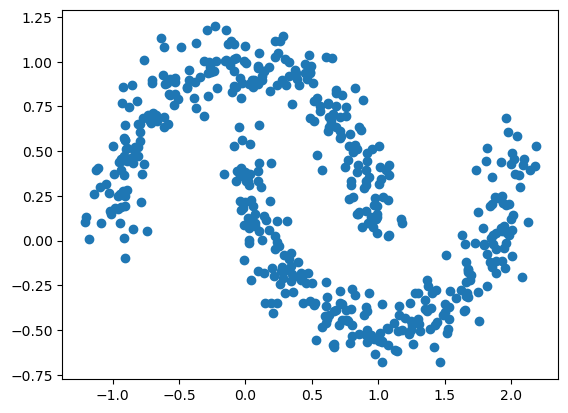

In [12]:
#Librerias
import numpy as np 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN

#Generamos datos

np.random.seed(111)
X, y = make_moons(n_samples = 500, noise = 0.1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [33]:
modelo = DBSCAN(eps = 0.15, min_samples = 2)
c = modelo.fit_predict(X)
np.unique(c)

array([-1,  0,  1,  2], dtype=int64)

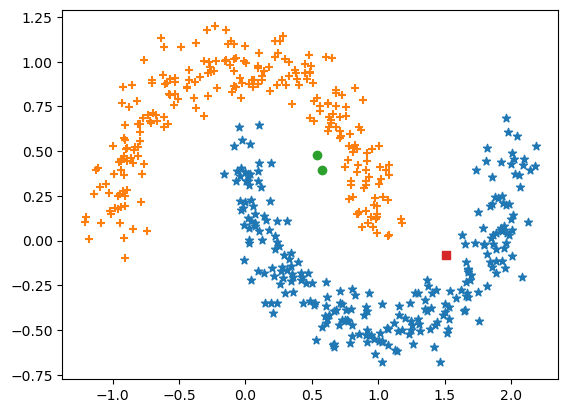

In [34]:
from sklearn.datasets import make_moons
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker= "*")
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker= "+")
plt.scatter(x= X[np.where(c == 2),0], y= X[np.where(c == 2),1], marker= "o")
plt.scatter(x= X[np.where(c == -1),0], y= X[np.where(c == -1),1], marker= "s")
plt.show()

In [35]:
modelo = DBSCAN(eps = 0.15, min_samples = 3)
c = modelo.fit_predict(X)
np.unique(c)

array([-1,  0,  1], dtype=int64)

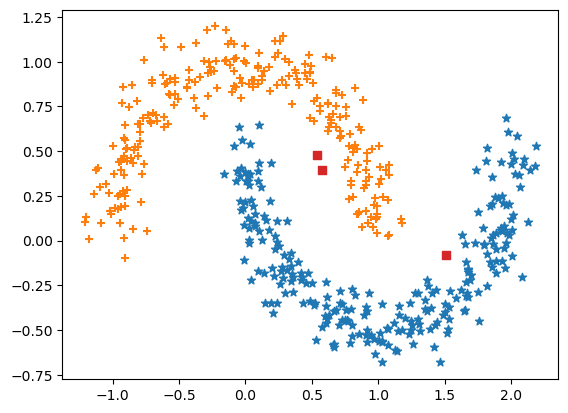

In [36]:
from sklearn.datasets import make_moons
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker= "*")
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker= "+")
plt.scatter(x= X[np.where(c == 2),0], y= X[np.where(c == 2),1], marker= "o")
plt.scatter(x= X[np.where(c == -1),0], y= X[np.where(c == -1),1], marker= "s")
plt.show()

Seguimos teniendo un grupo que basicamente es ruido, por lo que vamos a utilizar Silhouette para averiguar los parámetros correctos para poder eliminar este ruido y obtener solo las dos agrupaciones que buscamos.

In [38]:
import pandas as pd
from sklearn.metrics import silhouette_score    

#Aplicamos un rango de variación de los valores del DBSCAN
eps_vec = np.arange(start=0.1, stop=0.9, step=0.01)
min_samples_vec = np.arange(start=2, stop=5, step=1)

sil_avg = []
max_value = [0,0,0,0]

for eps_p in eps_vec:
    for min_samples_p in min_samples_vec:
        modelo = DBSCAN(eps=eps_p, min_samples=min_samples_p)
        c = modelo.fit_predict(X)
        labels = modelo.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X, labels)
            ind = silhouette_score(X, labels)
            if ind > max_value[3]:
                max_value= (eps_p, min_samples_p, n_clusters, ind)
                sil_avg.append(ind)
                
print("epsilon: %.4f" % max_value[0],"\nmin_samples: %.4f" % max_value[1], "\nNumber of clusters: %d" % max_value[2], "\nSilhouette score: %.4f" % max_value[3])                

epsilon: 0.1600 
min_samples: 2.0000 
Number of clusters: 2 
Silhouette score: 0.3207


In [39]:
modelo = DBSCAN(eps = 0.16, min_samples = 2)
c = modelo.fit_predict(X)
np.unique(c)

array([0, 1], dtype=int64)

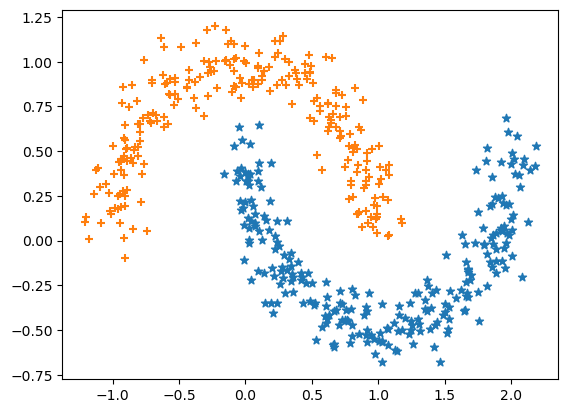

In [40]:
from sklearn.datasets import make_moons
plt.scatter(x= X[np.where(c == 0),0], y= X[np.where(c == 0),1], marker= "*")
plt.scatter(x= X[np.where(c == 1),0], y= X[np.where(c == 1),1], marker= "+")
plt.scatter(x= X[np.where(c == 2),0], y= X[np.where(c == 2),1], marker= "o")
plt.scatter(x= X[np.where(c == -1),0], y= X[np.where(c == -1),1], marker= "s")
plt.show()